# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df_kafe = pd.read_csv('df_kafe.csv')

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
df_kafe = df_kafe.drop(columns=["date", "datetime", "coffee_name"])

In [4]:
# Membagi dataset df_kafe menjadi training (80%) dan testing (20%)
train_df, test_df = train_test_split(df_kafe, test_size=0.2, random_state=42)

train_size, test_size = train_df.shape[0], test_df.shape[0]
train_size, test_size


(2039, 510)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
X_train = train_df.drop(columns=["cluster"])
y_train = train_df["cluster"]

X_test = test_df.drop(columns=["cluster"])
y_test = test_df["cluster"]

In [6]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Algoritma yang digunakan adalah Random Forest, yang merupakan model dari beberapa Decision Tree.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [7]:
y_pred = rf_model.predict(X_test)

print(y_pred[:10])


[2 0 2 0 2 0 1 0 0 0]


In [8]:
hasil_prediksi = pd.DataFrame({"Actual": y_test[:10].values, "Predicted": y_pred[:10]})
print(hasil_prediksi)


   Actual  Predicted
0       2          2
1       0          0
2       2          2
3       0          0
4       2          2
5       0          0
6       1          1
7       0          0
8       0          0
9       0          0


In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(f"Hasil Evaluasi Model:")
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1:.2%}")

Hasil Evaluasi Model:
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-Score: 100.00%


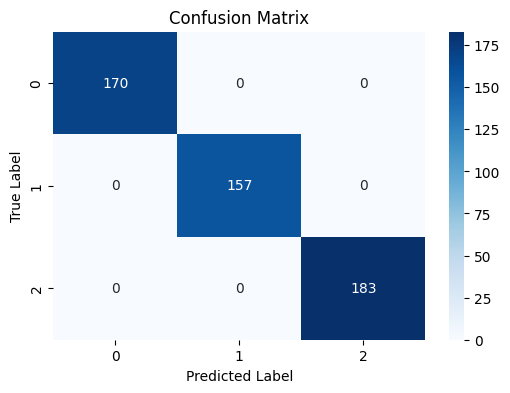

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

-Akurasi Model: 100%

-Model mampu mengklasifikasikan semua data uji

-Random Forest sangat baik untuk klasifikasi, terutama jika dataset memiliki banyak fitur numerik

-Model berhasil mendeteksi semua instance dari setiap kelas

-Model memiliki keseimbangan yang baik antara Precision dan Recall

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [11]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring="accuracy")

grid_search.fit(X_train, y_train)

print("Hyperparameter Terbaik:")
print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_pred_best = best_rf_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Akurasi setelah tuning: {accuracy_best:.2%}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Hyperparameter Terbaik:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Akurasi setelah tuning: 100.00%


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [12]:
best_rf_model = grid_search.best_estimator_

y_pred_best = best_rf_model.predict(X_test)



In [13]:
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f"Evaluasi Model Setelah Tuning:")
print(f"Akurasi: {accuracy_best:.2%}")
print(f"Precision: {precision_best:.2%}")
print(f"Recall: {recall_best:.2%}")
print(f"F1-Score: {f1_best:.2%}")


Evaluasi Model Setelah Tuning:
Akurasi: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-Score: 100.00%


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Pada kedua hasil semuanya memperoleh 100%.
2. Pada model mengalami overfitting hal ini didapatkan karena model sebelum dan sesudah tunning mendapatkan nilai yang sama yaitu 100%
3. Tindakan lanjutan yaitu mungkin dapat mencoba algoritma lain yang lebih simpel seperti KKN